### Homework 3.1.1 - Fourier Series

A periodic function with a period of $T=2$ can be decomposed into a Fourier series with the coefficients below:

$$
{\displaystyle {\begin{aligned}a_{0}= {\frac {2}{3}}\\a_{n}= {\frac {4}{\pi ^{2}n^{2}}}\\b_{n}= 0\\\end{aligned}}}
$$

$$
{\displaystyle f(t)={\frac {a_{0}}{2}}+\sum _{n=1}^{N}\left(a_{n}\cos \left({\tfrac {2\pi }{T}}nt\right)+b_{n}\sin \left({\tfrac {2\pi }{T}}nt\right)\right)}
$$

Use sufficiently large number of $N$ to reconstruct the periodict function $f(t)$ by ploting the graph for $-8 < t < 8$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

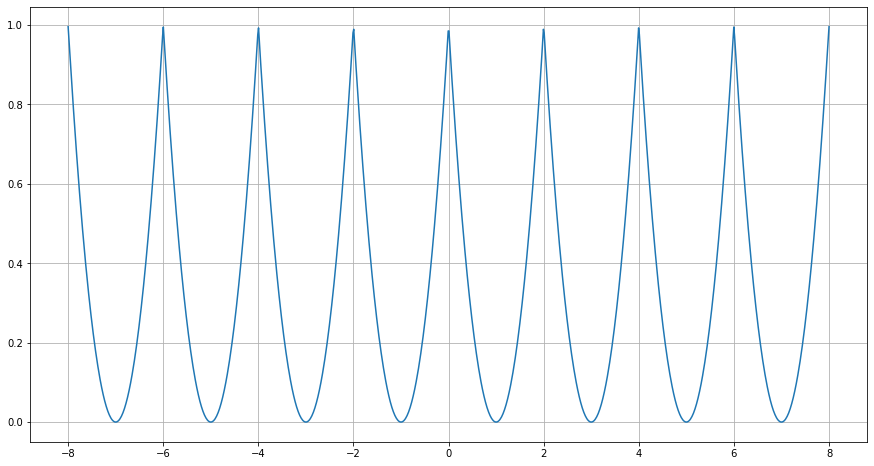

In [2]:
a0 = 2/3
N = 100
T = 2   # Period
const = 2*np.pi / T


def f(t):
    '''Return Fourier Series Solution'''
    def a(n):
        '''Return a_n given n > 0'''
        return 4 / (np.pi*n)**2

    return a0*0.5 + sum([a(n)*np.cos(const*n*t) for n in range(1, N+1)])

# Creat time inteval
t = np.linspace(-8, 8, 1000)
plt.figure(figsize=(15, 8))
plt.plot(t, f(t))
plt.grid()
plt.show()

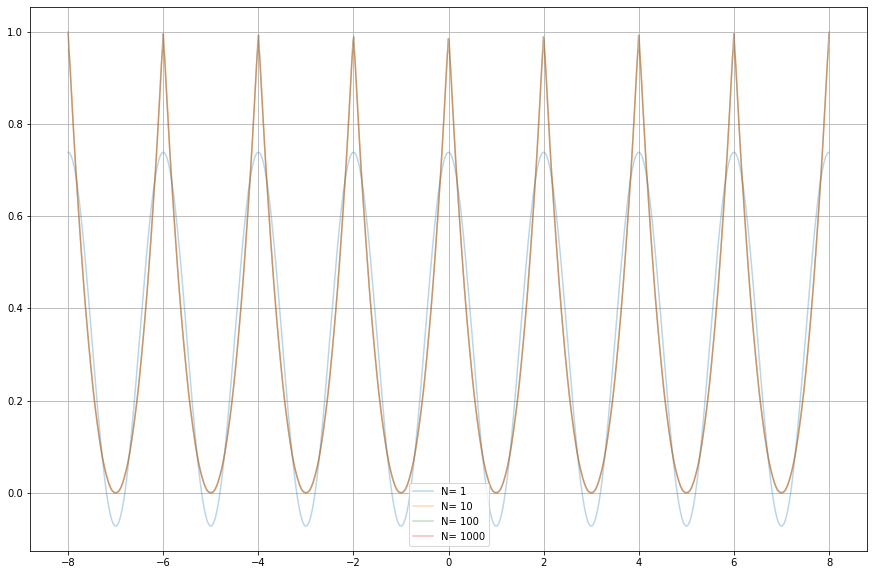

In [3]:
a0 = 2/3
T = 2   # Period
const = 2*np.pi / T


def makeF(N):
    '''Return Fourier Series Function depend on N'''
    def a(n):
        '''Return a_n given n > 0'''
        return 4 / (np.pi*n)**2

    def func(t):
        '''Return Fourier Series Solution'''
        return a0*0.5 + sum([a(n)*np.cos(const*n*t) for n in range(1, N+1)])
    return func


# Creat time inteval
t = np.linspace(-8, 8, 1000)
N = [1, 10, 100, 1000]
plt.figure(figsize=(15, 10))
for n in N:
    func = makeF(n)
    plt.plot(t, func(t), label=f'N= {n}', alpha=0.3)
plt.grid()
plt.legend()
plt.show()

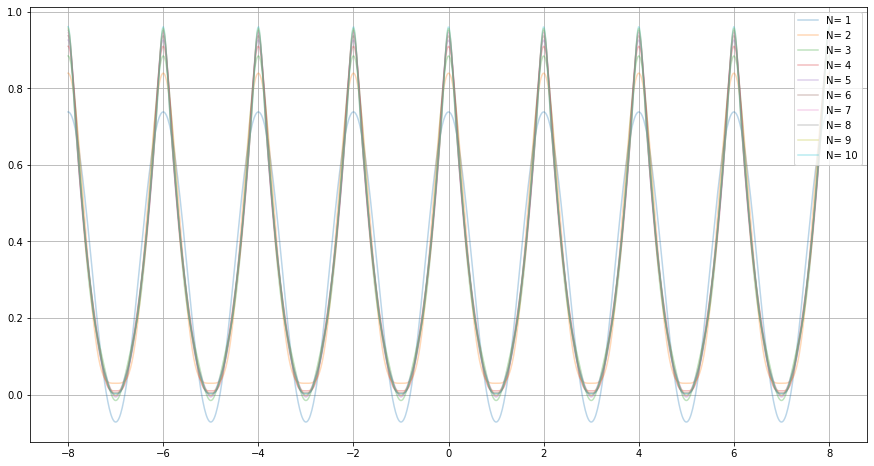

In [4]:
# Creat time inteval
t = np.linspace(-8, 8, 1000)
N = [n for n in range(1, 11)]
plt.figure(figsize=(15, 8))
for n in N:
    func = makeF(n)
    plt.plot(t, func(t), label=f'N= {n}', alpha=0.3)
plt.grid()
plt.legend()
plt.show()

___
### Homework 3.1.2

A function $f(x)$ is given by the code and is shown below. Given that the function is periodict function between $-4 < x < 4$, find the first 100 coefficients of the Fourier series and use that coefficients to reconstruct the signal for $-16 < x < 16$.

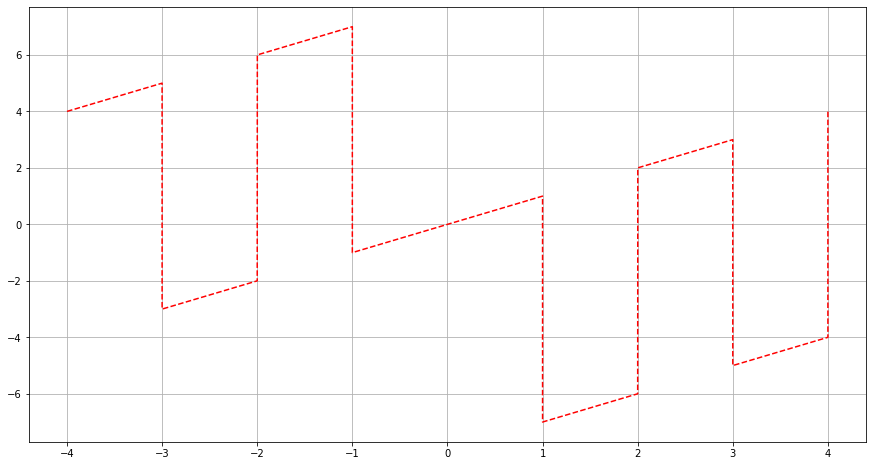

In [5]:
def f(x):
    if (x > 4) or (x < -4):
        raise Exception("Out of bound")
    elif (-4 <= x < -3) or (-2 <= x < -1):
        return x + 8
    elif (1 <= x < 2) or (3 <= x < 4):
        return x - 8
    else:
        return x


x = np.linspace(-4, 4, 100000)
y = [f(e) for e in x]

plt.figure(figsize=(15, 8))
plt.plot(x, y, 'r--')
plt.grid()
plt.show()

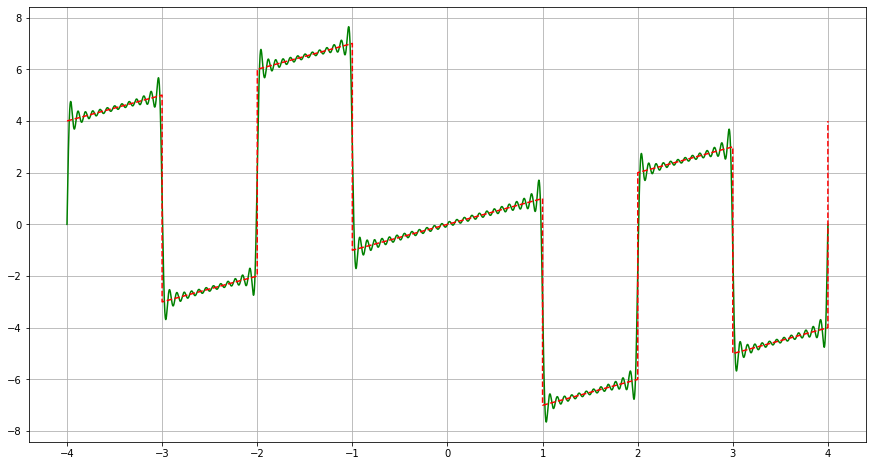

In [6]:
def fourierCoeff(li, lf, n, f):
    l = (lf-li) * 0.5
    # Constant term
    a0 = 1/l*quad(lambda x: f(x), li, lf, limit=500)[0]
    A = np.zeros((n))  # Cos coefficents
    B = np.zeros((n))  # Sin coefficents

    def fCos(x):
        return f(x)*np.cos(i*np.pi*x/l)

    def fSin(x):
        return f(x)*np.sin(i*np.pi*x/l)

    for i in range(1, n+1):
        A[i-1] = 1/l*quad(lambda x: fCos(x), li, lf, limit=500)[0]  # An
        B[i-1] = 1/l*quad(lambda x: fSin(x), li, lf, limit=500)[0]  # Bn

    return [a0*0.5, A, B]


def fourierSeries(coeffs, x, l, n):
    value = coeffs[0]  # This is a0/2
    for i in range(1, n+1):
        left = coeffs[1][i-1]*np.cos(i*np.pi*x/l)  # An * Cos
        right = coeffs[2][i-1]*np.sin(i*np.pi*x/l)  # Bn * Sin
        value += left + right
    return value


li = -4  # Lower bound
lf = 4   # Upper bound
l = (lf-li) * 0.5  # Bound length

n = 100  # Coeff Terms
coeffs = fourierCoeff(li, lf, n, f)  # Fourier coeffficients

x1 = np.linspace(li, lf, 100000)
y1 = [fourierSeries(coeffs, xi, l, n) for xi in x1]

plt.figure(figsize=(15, 8))
plt.plot(x1, y1, 'g')
plt.plot(x, y, 'r--')
plt.grid()

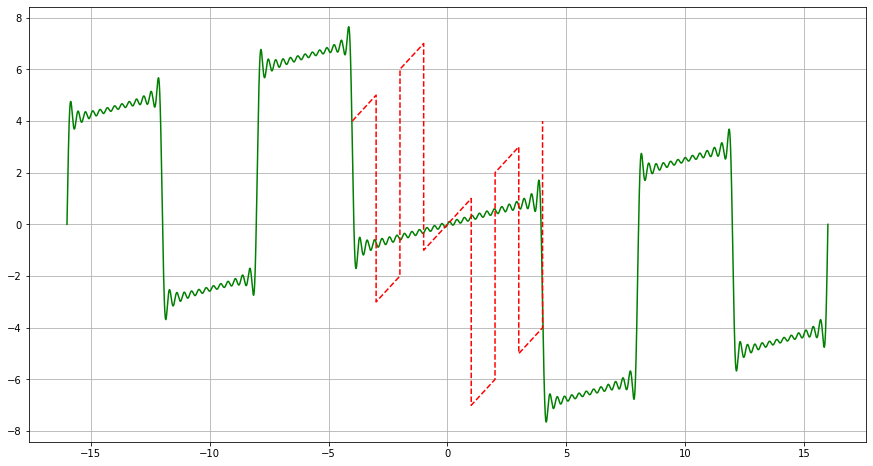

In [7]:
li = -16  # Lower bound
lf = 16   # Upper bound
l = (lf-li) * 0.5  # Bound length

x2 = np.linspace(li, lf, 100000)
y2 = [fourierSeries(coeffs, xi, l, n) for xi in x2]

plt.figure(figsize=(15, 8))
plt.plot(x2, y2, 'g')
plt.plot(x, y, 'r--')
plt.grid()

In [8]:
print('a0 =', coeffs[0])
print('An =', coeffs[1])
print('Bn =', coeffs[2])

a0 = 0.0
An = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Bn = [-2.54647909 -1.27323954 -0.84882636  4.45633841 -0.50929582 -0.42441318
 -0.36378273 -0.31830989 -0.28294212 -0.25464791 -0.2314981   1.48544614
 -0.19588301 -0.18189136 -0.16976527 -0.15915494 -0.14979289 -0.14147106
 -0.13402522  0.89126768 -0.12126091 -0.11574905 -0.11071648 -0.1061033
 -0.10185916 -0.0979415  -0.09431404  0.63661977 -0.08780962 -0.08488264
 -0.08214449 -0.07957747 -0.07716603 -0.07489644 -0.07275655  0.49514871
 -0.06882376 -0.06701261 -0.06529434 -0.06366198 -0.06210925 -0.06063045
 -0.05922044  0.40512167 -0.05658842 -0.05535824 -0.05418041 -0.05305165
 -0.05196896 -0.05092958 -0.04993096  0.34279526 -0.04804678 -0.04715702
 -0.04629962 -0.045